In [5]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, transpile, execute, assemble
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.quantum_info import state_fidelity
from numpy.random import random
import matplotlib.pyplot as plt
import numpy as np
from qiskit.providers.aer.noise import NoiseModel
from qiskit.quantum_info import state_fidelity
from qiskit.ignis.mitigation.measurement import (complete_meas_cal,CompleteMeasFitter)
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u1', 'u2', 'u3']
  All-qubits errors: ['u1', 'u2', 'u3']
NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u1', 'u2', 'u3']
  All-qubits errors: ['u1', 'u2', 'u3']
NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u1', 'u2', 'u3']
  All-qubits errors: ['u1', 'u2', 'u3']
NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u1', 'u2', 'u3']
  All-qubits errors: ['u1', 'u2', 'u3']
NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u1', 'u2', 'u3']
  All-qubits errors: ['u1', 'u2', 'u3']
NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u1', 'u2', 'u3']
  All-qubits errors: ['u1', 'u2', 'u3']
NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 

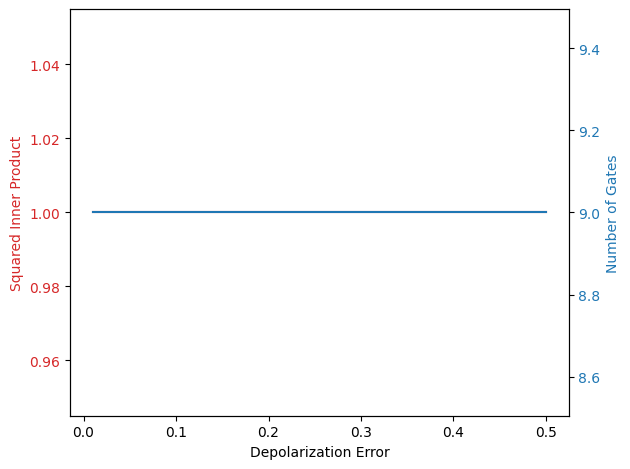

In [11]:
# Define the initial states
state1 = np.array([np.sqrt(1/10), np.sqrt(2/10), np.sqrt(6/10), np.sqrt(1/10)])
state2 = np.array([np.sqrt(0/10), np.sqrt(5/10), np.sqrt(1/10), np.sqrt(4/10)])

# Define the depolarization error range and step size
error_range = np.arange(0.01, 0.51, 0.01)

# Initialize lists to store the results
squared_inner_products = []
num_gates = []

# Loop over the depolarization error range
for error in error_range:
    # Create the swap test circuit
    qc = QuantumCircuit(4, 2)

    qc.initialize(state1, [0, 1])

    qc.x(2)
    qc.barrier()
    # Define the depolarizing error
    # Create an empty noise model
    noise_model = NoiseModel()

    # Add depolarizing error to all single qubit u1, u2, u3 gates
    error = depolarizing_error(0.05, 1)
    noise_model.add_all_qubit_quantum_error(error, ['u1', 'u2', 'u3'])

    # Print noise model info
    print(noise_model)
    qc.initialize(state2, [2, 3])
    qc.h(0)
    qc.cx(0, 1)
    qc.ccx(2, 1, 0)
    qc.cx(0, 1)
    qc.barrier()
    qc.h(0)
    qc.barrier()

    qc.measure(0, 0)
    
    # Execute the circuit on the simulator
    nshots = 8192
    simulator = Aer.get_backend('aer_simulator')
    job = execute(qc, simulator, shots=nshots)
    counts = job.result().get_counts()

    if '1' in counts:
        b = counts['1']
    else:
        b = 0

    s = 1 - (2/nshots)*(b)
    squared_inner_products.append(s)
    num_gates.append(qc.size())

# Plot the results
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Depolarization Error')
ax1.set_ylabel('Squared Inner Product', color=color)
ax1.plot(error_range, squared_inner_products, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Number of Gates', color=color)
ax2.plot(error_range, num_gates, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()